In [27]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sqlite3
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

/Users/chrisschon/miniconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
conn = sqlite3.connect('bosh.db')
c = conn.cursor()

In [71]:
sales = pd.read_sql('select * from sales where item_id = 362', con = conn)

In [72]:
dates = pd.read_sql('select * from dates', con = conn).set_index('date_id')

In [73]:
sales_df = sales.merge(dates['date_name'], left_on = 'date_id', right_index = True)
sales_df['date_name'] = sales_df['date_name'].map(lambda x: pd.to_datetime(x))

In [117]:
class Series:
    def __init__(self, df, valcol):
        self.df = df
        self.columns = list(df.columns)
        self.valcol = valcol
        self.tseries = df[valcol]
        self.length = len(df[valcol])
        self.description = df[valcol].describe()
        self.model = None
        
    def plot_series(self, idx_range, **subplkwargs):
        plot_range = idx_range
        fig, ax = plt.subplots(**subplkwargs)
        ax.plot(tseries[plot_range])
        
    def plot_forecast(self, model, back = 28, forward = 28):
        
        
        
    def plot_acf(self, lags = [0,365], **subplkwargs):
        fig, ax = plt.subplots(**subplkwargs)
        autocorrelation_plot(sales[self.valcol], ax = ax)
        ax.set_xlim(lags)
        
    def model_arima(self, p, d, q):
        model = ARIMA(self.tseries, order=(p,d,q))
        model_fit = model.fit(disp=0)
        return(model,model_fit)
        
        
        
        
        


In [118]:
s = Series(sales_df, 'sales_count')

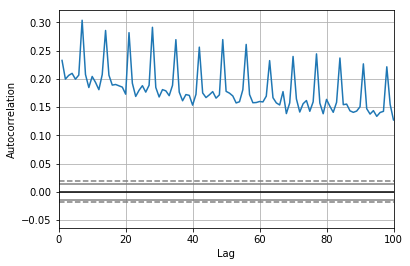

In [119]:
s.plot_acf(lags = [0,100])

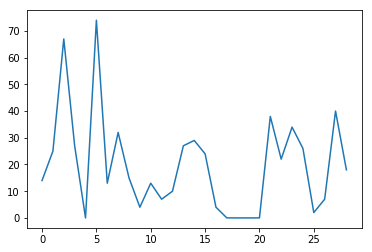

In [120]:
s.plot_series(idx_range = np.arange(29))

In [123]:
model, model_fit = s.model_arima(7,1,0)

/Users/chrisschon/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/chrisschon/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [124]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.sales_count   No. Observations:                19129
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -68329.126
Method:                       css-mle   S.D. of innovations              8.611
Date:                Sun, 05 Apr 2020   AIC                         136676.252
Time:                        16:00:54   BIC                         136746.983
Sample:                             1   HQIC                        136699.443
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0003      0.014     -0.019      0.985      -0.027       0.027
ar.L1.D.sales_count    -0.8715      0.007   -121.676      0.000      -0.886      -0.857
ar.L2.D.sales_count    -0.7208      0.009    -77.343      0.000      -0.739      -0.703
ar.L3.D.sales_count    -0.5934      0.010    -57.550      0.000      -0.614      -0.573
ar.L4.D.sales_count    -0.5016      0.011    -47.495      0.000      -0.522      -0.481
ar.L5.D.sales_count    -0.3840      0.010    -37.242      0.000      -0.404      -0.364
ar.L6.D.sales_count    -0.2819      0.009    -30.247      0.000      -0.300      -0.264
ar.L7.D.sales_count    -0.1365      0.007    -19.064      0.000      -0.151      -0.123
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8166           -0.9444j            1.2485           -0.1365
AR.2            0.8166           +0.9444j            1.2485            0.1365
AR.3           -0.1049           -1.3236j            1.3277           -0.2626
AR.4           -0.1049           +1.3236j            1.3277            0.2626
AR.5           -1.0226           -0.8954j            1.3592           -0.3855
AR.6           -1.0226           +0.8954j            1.3592            0.3855
AR.7           -1.4427           -0.0000j            1.4427           -0.5000
-----------------------------------------------------------------------------
"""